<a href="https://colab.research.google.com/github/JakeJasmer/D/blob/main/23S_Needleman_Wunsch_Smith_Waterman_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Needleman-Wunsch algorithm compares two arbitrary strings, and optimally under a given scoring scheme, returns the highest scoring alignment between the two.

Lets do a comparison of two gene orthologues for hemoglobin subunit beta, between the human and the mouse versions.

The indivudual mRNA sequences were obtained from NCBI, from

Human: http://www.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000244734;r=11:5225464-5229395;t=ENST00000335295

Mouse: http://www.ensembl.org/Mus_musculus/Transcript/Summary?db=core;g=ENSMUSG00000073940;r=7:103812524-103813996;t=ENSMUST00000098192

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

human_HBB = "ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA"
mouse_HBB = "ATGGTGCACCTGACTGATGCTGAGAAGGCTGCTGTCTCTGGCCTGTGGGGAAAGGTGAACGCCGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTTGTCTACCCTTGGACCCAGCGGTACTTTGATAGCTTTGGAGACCTATCCTCTGCCTCTGCTATCATGGGTAATGCCAAAGTGAAGGCCCATGGCAAGAAAGTGATAACTGCCTTTAACGATGGCCTGAATCACTTGGACAGCCTCAAGGGCACCTTTGCCAGCCTCAGTGAGCTCCACTGTGACAAGCTGCATGTGGATCCTGAGAACTTCAGGCTCCTGGGCAATATGATCGTGATTGTGCTGGGCCACCACCTGGGCAAGGATTTCACCCCCGCTGCACAGGCTGCCTTCCAGAAGGTGGTGGCTGGAGTGGCTGCTGCCCTGGCTCACAAGTACCACTAA"


In order to perform alignment, we need to define a scoring function for sequences. A good starting point is to use a score of 1 for a match, -1 for a mismatch and -1 for a gaps

In [ ]:
def match_score(a,b):
  if a == b:
    return 1
  else:
    return -1

gap_score = -1

In [ ]:
def NeedlemanWunsch(query, subject, scorefunc):
  t0 = time.perf_counter()
  nwmatrix = np.zeros ((len(query)+1,len(subject)+1))
  # TODO: we need to initialize the first row and column of the matrix to increasing gap penalties

  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      #the value of each cell is MAX(NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score)
      nwmatrix[q,s] = max(match_score("A","C"),gap_score,gap_score) #TODO:

  #The traceback starts from the bottom right corner of the matrix, (e.g. [len(query)-1, len(subject)-1])
  #And proceeds up/left to whichever cell won the maximum, any choice is valid on equality
  traceback_position = (len(query), len(subject) )

  while traceback_position != (0,0):
    #TODO: trace backwards, and print out the alignment!
    break #just so our test runs :)
  alignment_score = nwmatrix[len(query), len(subject) ]
  print ('Alignment performed in %.3f seconds'%(time.perf_counter()-t0))

  sns.heatmap(nwmatrix)
  plt.show()
  return alignment_score


The total alignment score is also present in the bottom right corner of the matrix.
If the traceback is not required, then often times just returning the score is sufficient

Alignment performed in 0.111 seconds


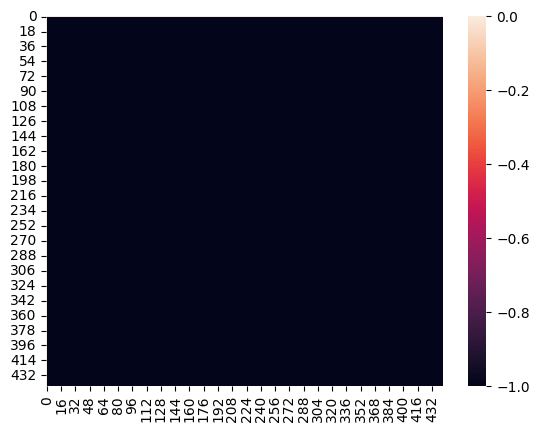

In [ ]:

score = NeedlemanWunsch(human_HBB,mouse_HBB,match_score)



Note the time it takes to run your algorithm. I will give extra credit to the fastest implementations. Naturally, you dont have to include the drawing of the diagrams inside the calculation.


Next, try to implement the Smith Waterman Algorithm:

In [ ]:
def SmithWaterman(query,subject,scorefunc):
  swmatrix = np.zeros ((len(query) + 1,len(subject) + 1)) #in Smith-Waterman, we only initialize to 0

  for q in range(1,len(query)+1):
    for s in range(1,len(subject)+1):
      #the value of each cell is MAX[NW[q-1, s-1] + match_score, NW[q-1, s] + gap_score, NW[q, s-1] + gap_score, 0]
      #Note that we cannot go below 0!
      swmatrix[q,s] = max(....) #TODO

  #TODO: trace back from the highest scoring cell while score is greater than 0!
  #Proceeds up/left to whichever cell won the maximum, any choice is valid on equality
  fig, ax = plt.subplots(figsize=(25,10))
  sns.heatmap(swmatrix)
  plt.show()
  return alignment_score

And compare the coding region of human_HBB with the entire mRNA transcript of human_HBB_CDS!

Are there multiple candidate matches? Are there multiple regions of long matches?


In [ ]:

human_HBB_CDS = "TTGGAAAAGCAACCCCTGCCTTGAAGCCAGGATGATGGTATCTGCAGCAGTTGCCAACACAAGAGAAGGATCCATAGTTCATCATTTAAAAAAGAAAACAAAATAGAAAAAGGAAAACTATTTCTGAGCATAAGAAGTTGTAGGGTAAGTCTTTAAGAAGGTGACAATTTCTGCCAATCAGGATTTCAAAGCTCTTGCTTTGACAATTTTGGTCTTTCAGAATACTATAAATATAACCTATATTATAATTTCATAAAGTCTGTGCATTTTCTTTGACCCAGGATATTTGCAAAAGACATATTCAAACTTCCGCAGAACACTTTATTTCACATATACATGCCTCTTATATCAGGGATGTGAAACAGGGTCTTGAAAACTGTCTAAATCTAAAACAATGCTAATGCAGGTTTAAATTTAATAAAATAAAATCCAAAATCTAACAGCCAAGTCAAATCTGCATGTTTTAACATTTAAAATATTTTAAAGACGTCTTTTCCCAGGATTCAACATGTGAAATCTTTTCTCAGGGATACACGTGTGCCTAGATCCTCATTGCTTTAGTTTTTTACAGAGGAATGAATATAAAAAGAAAATACTTAAATTTTATCCCTCTTACCTCTATAATCATACATAGGCATAATTTTTTAACCTAGGCTCCAGATAGCCATAGAAGAACCAAACACTTTCTGCGTGTGTGAGAATAATCAGAGTGAGATTTTTTCACAAGTACCTGATGAGGGTTGAGACAGGTAGAAAAAGTGAGAGATCTCTATTTATTTAGCAATAATAGAGAAAGCATTTAAGAGAATAAAGCAATGGAAATAAGAAATTTGTAAATTTCCTTCTGATAACTAGAAATAGAGGATCCAGTTTCTTTTGGTTAACCTAAATTTTATTTCATTTTATTGTTTTATTTTATTTTATTTTATTTTATTTTGTGTAATCGTAGTTTCAGAGTGTTAGAGCTGAAAGGAAGAAGTAGGAGAAACATGCAAAGTAAAAGTATAACACTTTCCTTACTAAACCGACATGGGTTTCCAGGTAGGGGCAGGATTCAGGATGACTGACAGGGCCCTTAGGGAACACTGAGACCCTACGCTGACCTCATAAATGCTTGCTACCTTTGCTGTTTTAATTACATCTTTTAATAGCAGGAAGCAGAACTCTGCACTTCAAAAGTTTTTCCTCACCTGAGGAGTTAATTTAGTACAAGGGGAAAAAGTACAGGGGGATGGGAGAAAGGCGATCACGTTGGGAAGCTATAGAGAAAGAAGAGTAAATTTTAGTAAAGGAGGTTTAAACAAACAAAATATAAAGAGAAATAGGAACTTGAATCAAGGAAATGATTTTAAAACGCAGTATTCTTAGTGGACTAGAGGAAAAAAATAATCTGAGCCAAGTAGAAGACCTTTTCCCCTCCTACCCCTACTTTCTAAGTCACAGAGGCTTTTTGTTCCCCCAGACACTCTTGCAGATTAGTCCAGGCAGAAACAGTTAGATGTCCCCAGTTAACCTCCTATTTGACACCACTGATTACCCCATTGATAGTCACACTTTGGGTTGTAAGTGACTTTTTATTTATTTGTATTTTTGACTGCATTAAGAGGTCTCTAGTTTTTTATCTCTTGTTTCCCAAAACCTAATAAGTAACTAATGCACAGAGCACATTGATTTGTATTTATTCTATTTTTAGACATAATTTATTAGCATGCATGAGCAAATTAAGAAAAACAACAACAAATGAATGCATATATATGTATATGTATGTGTGTATATATACACACATATATATATATATTTTTTCTTTTCTTACCAGAAGGTTTTAATCCAAATAAGGAGAAGATATGCTTAGAACCGAGGTAGAGTTTTCATCCATTCTGTCCTGTAAGTATTTTGCATATTCTGGAGACGCAGGAAGAGATCCATCTACATATCCCAAAGCTGAATTATGGTAGACAAAACTCTTCCACTTTTAGTGCATCAACTTCTTATTTGTGTAATAAGAAAATTGGGAAAACGATCTTCAATATGCTTACCAAGCTGTGATTCCAAATATTACGTAAATACACTTGCAAAGGAGGATGTTTTTAGTAGCAATTTGTACTGATGGTATGGGGCCAAGAGATATATCTTAGAGGGAGGGCTGAGGGTTTGAAGTCCAACTCCTAAGCCAGTGCCAGAAGAGCCAAGGACAGGTACGGCTGTCATCACTTAGACCTCACCCTGTGGAGCCACACCCTAGGGTTGGCCAATCTACTCCCAGGAGCAGGGAGGGCAGGAGCCAGGGCTGGGCATAAAAGTCAGGGCAGAGCCATCTATTGCTTACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGTGTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGTGTAATGTTTTAATATGTGTACACATATTGACCAAATCAGGGTAATTTTGCATTTGTAATTTTAAAAAATGCTTTCTTCTTTTAATATACTTTTTTGTTTATCTTATTTCTAATACTTTCCCTAATCTCTTTCTTTCAGGGCAATAATGATACAATGTATCATGCCTCTTTGCACCATTCTAAAGAATAACAGTGATAATTTCTGGGTTAAGGCAATAGCAATATCTCTGCATATAAATATTTCTGCATATAAATTGTAACTGATGTAAGAGGTTTCATATTGCTAATAGCAGCTACAATCCAGCTACCATTCTGCTTTTATTTTATGGTTGGGATAAGGCTGGATTATTCTGAGTCCAAGCTAGGCCCTTTTGCTAATCATGTTCATACCTCTTATCTTCCTCCCACAGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGCAA"

score = SmithWaterman(human_HBB,human_HBB_CDS,match_score)


Change the scoring function to have higher penalties for both gaps and mismatches. Align human_HBB with human_HBB_CDS again with the new scores using the SW algorithm. How did this change our results?

Try defining an even better scoring function, one that adds higher penalties to purine/pyrimidine mismatches, as those are evolutionarily less likely, and compare the human and mouse HBB genes.

Finally, dont forget to upload a copy of this notebook into Moodle for grading.